In [3]:
import warnings #경고 미출력
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import missingno as msno 
from google.colab import drive

warnings.filterwarnings('ignore')
drive.mount("/content/drive")

Mounted at /content/drive


In [4]:
f_path = "/content/drive/MyDrive/함께하조/data/lendingclub_train.dta"
df = pd.read_stata(f_path)

test_path = "/content/drive/MyDrive/함께하조/data/lendingclub_test.dta"
test = pd.read_stata(test_path)

In [5]:
print(len(set(df.columns)))
print(len(set(test.columns)))

334
334


In [6]:
set(df.columns) - set(test.columns)

set()

In [7]:
print(df.shape)

(874335, 334)


In [8]:
df["depvar"]

0         1.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
874330    0.0
874331    0.0
874332    0.0
874333    0.0
874334    0.0
Name: depvar, Length: 874335, dtype: float32

In [9]:
fico_high_del = df.loc[ df["depvar"]==1.0,"last_fico_range_high"] 

In [10]:
fico_high_del[fico_high_del == 499].count()

16196

In [11]:
fico_high_ful = df.loc[ df["depvar"]==0.0,"last_fico_range_high"] 
fico_high_ful[fico_high_ful == 499].count()

4720

In [12]:
fico_low_del = df.loc[ df["depvar"]==1.0,"last_fico_range_low"]
fico_low_del[fico_low_del == 0].count()

16212

In [13]:
fico_low_ful = df.loc[ df["depvar"]==0.0,"last_fico_range_low"]
fico_low_ful[fico_low_ful == 0].count()

4838

In [14]:
fico = df["depvar"][df["last_fico_range_high"]-df["last_fico_range_low"]==499]

In [15]:
fico

8         1.0
97        1.0
131       1.0
150       1.0
174       1.0
         ... 
874262    0.0
874282    1.0
874301    1.0
874319    1.0
874324    1.0
Name: depvar, Length: 20916, dtype: float32

In [16]:
fico[fico==1.0].count()

16196

In [17]:
fico[fico==0.0].count()

4720

In [18]:
# Null data의 비율
(df.isnull().sum().sum())/(df.shape[0]*df.shape[1])

0.0

In [19]:
# 종속 변수의 비율 불균형 데이터
df["depvar"].value_counts()

0.0    732652
1.0    141683
Name: depvar, dtype: int64

In [20]:
# 컬럼 이름: 데이터 타입
for i in range(df.shape[1]):
    print(f"{df.columns[i]}: {df.dtypes[i]}")

index: int32
loan_amnt: int32
funded_amnt: int32
funded_amnt_inv: float64
int_rate: float64
installment: float64
annual_inc: float64
dti: float64
delinq_2yrs: int8
fico_range_low: int16
fico_range_high: int16
inq_last_6mths: int8
open_acc: int16
pub_rec: int8
revol_bal: int32
revol_util: float64
total_acc: int16
out_prncp: float64
out_prncp_inv: float64
total_pymnt: float64
total_pymnt_inv: float64
total_rec_prncp: float64
total_rec_int: float64
total_rec_late_fee: float64
recoveries: float64
collection_recovery_fee: float64
last_pymnt_amnt: float64
last_fico_range_high: int16
last_fico_range_low: int16
collections_12_mths_ex_med: int8
acc_now_delinq: int8
tot_coll_amt: int32
tot_cur_bal: int32
chargeoff_within_12_mths: int8
delinq_amnt: int32
pub_rec_bankruptcies: int8
tax_liens: int8
emp_length1: int8
emp_length2: int8
emp_length3: int8
emp_length4: int8
emp_length5: int8
emp_length6: int8
emp_length7: int8
emp_length8: int8
emp_length9: int8
emp_length10: int8
emp_length11: int8
emp

In [21]:
#각 타입별로 몇개의 컬럼이 있는지
def col_type(df):
    col_type = pd.Series([df.dtypes[i] for i in range(df.shape[1])])
    print(col_type.value_counts())

In [22]:
col_type(df)

int8       303
float64     16
int32        7
int16        6
float32      2
dtype: int64


In [23]:
#이진변수로 이루어진 column 확인
for col in df.columns:
    if len(df[col].unique()) == 2:
        print(col)

emp_length1
emp_length2
emp_length3
emp_length4
emp_length5
emp_length6
emp_length7
emp_length8
emp_length9
emp_length10
emp_length11
emp_length12
home_ownership1
home_ownership2
home_ownership3
home_ownership4
home_ownership5
home_ownership6
verification_status1
verification_status2
verification_status3
purpose1
purpose2
purpose3
purpose4
purpose5
purpose6
purpose7
purpose8
purpose9
purpose10
purpose11
purpose12
purpose13
purpose14
addr_state1
addr_state2
addr_state3
addr_state4
addr_state5
addr_state6
addr_state7
addr_state8
addr_state9
addr_state10
addr_state11
addr_state12
addr_state13
addr_state14
addr_state15
addr_state16
addr_state17
addr_state18
addr_state19
addr_state20
addr_state21
addr_state22
addr_state23
addr_state24
addr_state25
addr_state26
addr_state27
addr_state28
addr_state29
addr_state30
addr_state31
addr_state32
addr_state33
addr_state34
addr_state35
addr_state36
addr_state37
addr_state38
addr_state39
addr_state40
addr_state41
addr_state42
addr_state43
addr_state44


In [24]:
dummy_cols = ["emp_length", "home_ownership", "verification_status", "purpose", "addr_state", 'initial_list_status', 'issue_d', 'mths_since_last_delinq',
        'mths_since_last_major_derog', 'mths_since_last_record', 'mths_since_rcnt_il', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq',
        'mths_since_recent_inq', 'mths_since_recent_revol_delinq']

In [25]:
# 더미변수중 한가지의 value만 가지고 있는것을 파악하기 위해, 이 코드 이전에 value_counts로도 확인하였음
drop_cols = []
for i in df.columns[df.dtypes == 'int8']:
    print(i)
    print(df[i].nunique())
    print('************************')
    if df[i].nunique() == 1:
        drop_cols.append(i)

#의미없는 컬럼 삭제
col_len = df.shape[1]
df.drop(drop_cols, axis=1,inplace=True)
print((col_len - df.shape[1])==len(drop_cols))

test.drop(drop_cols, axis=1, inplace=True)
print((col_len - test.shape[1])==len(drop_cols))

delinq_2yrs
26
************************
inq_last_6mths
9
************************
pub_rec
34
************************
collections_12_mths_ex_med
15
************************
acc_now_delinq
8
************************
chargeoff_within_12_mths
10
************************
pub_rec_bankruptcies
11
************************
tax_liens
34
************************
emp_length1
2
************************
emp_length2
2
************************
emp_length3
2
************************
emp_length4
2
************************
emp_length5
2
************************
emp_length6
2
************************
emp_length7
2
************************
emp_length8
2
************************
emp_length9
2
************************
emp_length10
2
************************
emp_length11
2
************************
emp_length12
2
************************
home_ownership1
2
************************
home_ownership2
2
************************
home_ownership3
2
************************
home_ownership4
2
************************
ho

### dummy col 역변환

In [26]:
from pandas.io.formats.format import DataFrameRenderer
def plot_hist(col):
    # issue plot
    %matplotlib inline 
    plt.hist(df[col], color="c")
    plt.xlabel("time")
    plt.ylabel("frequency")
    plt.title(f"{col}_histogram")
    plt.grid()
    plt.show()

def reverse_transform(cols, df):
    for col in cols:
        print("*"*50)
        print(f"{col}작업 시작")
        #col을 통합하기 위해서 np.mean으로 초기화 
        df[col] = [np.nan for _ in range(df.shape[0])]

        #targets 는 col에 더미변수에 해당하는 col이름 ex) emp_length 이면 emp_length1, emp_length2 .....
        targets = [name for name in df.columns[df.dtypes == 'int8'] if name[:len(col)] == col and name[len(col):].isnumeric()]
        print(f"target추가: {targets}")

        # df.loc을 이용하여 연속형 변수로 만들어주기
        for target in targets:
            num = int(target[len(col):])
            df.loc[df[target] == 1, col] = num
        
        print(df[col].value_counts())
        col_num = df.shape[1]
        df.drop(targets, axis=1, inplace=True)
        print((col_num - df.shape[1])==len(targets))
        plot_hist(col)
    
    return df

**************************************************
emp_length작업 시작
target추가: ['emp_length1', 'emp_length2', 'emp_length3', 'emp_length4', 'emp_length5', 'emp_length6', 'emp_length7', 'emp_length8', 'emp_length9', 'emp_length10', 'emp_length11', 'emp_length12']
2.0     288553
3.0      78893
4.0      69896
11.0     67158
1.0      57342
12.0     53652
6.0      53590
5.0      50974
9.0      40650
7.0      40619
8.0      39178
10.0     33830
Name: emp_length, dtype: int64
True


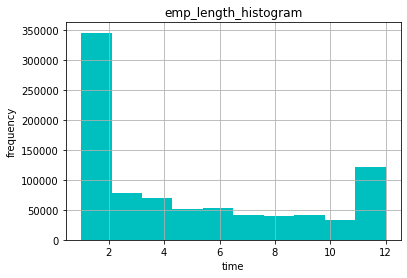

**************************************************
home_ownership작업 시작
target추가: ['home_ownership1', 'home_ownership2', 'home_ownership3', 'home_ownership4', 'home_ownership5', 'home_ownership6']
2.0    420774
6.0    357759
5.0     95430
1.0       301
4.0        36
3.0        35
Name: home_ownership, dtype: int64
True


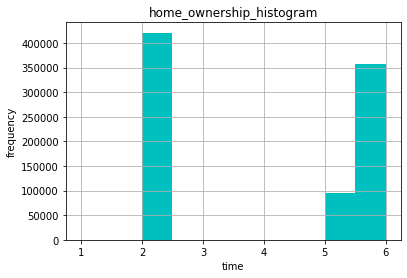

**************************************************
verification_status작업 시작
target추가: ['verification_status1', 'verification_status2', 'verification_status3']
2.0    337774
1.0    294460
3.0    242101
Name: verification_status, dtype: int64
True


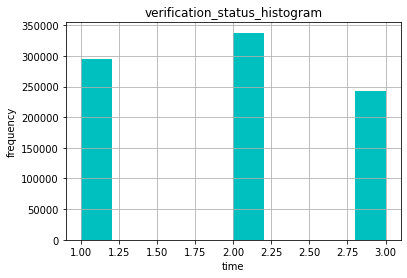

**************************************************
purpose작업 시작
target추가: ['purpose1', 'purpose2', 'purpose3', 'purpose4', 'purpose5', 'purpose6', 'purpose7', 'purpose8', 'purpose9', 'purpose10', 'purpose11', 'purpose12', 'purpose13', 'purpose14']
3.0     504264
2.0     202458
5.0      54677
10.0     50078
7.0      17793
8.0       9904
12.0      9109
1.0       8864
13.0      6198
9.0       6141
6.0       3580
14.0       688
11.0       580
4.0          1
Name: purpose, dtype: int64
True


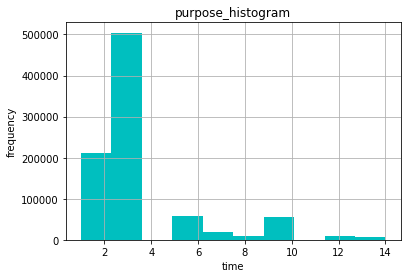

**************************************************
addr_state작업 시작
target추가: ['addr_state1', 'addr_state2', 'addr_state3', 'addr_state4', 'addr_state5', 'addr_state6', 'addr_state7', 'addr_state8', 'addr_state9', 'addr_state10', 'addr_state11', 'addr_state12', 'addr_state13', 'addr_state14', 'addr_state15', 'addr_state16', 'addr_state17', 'addr_state18', 'addr_state19', 'addr_state20', 'addr_state21', 'addr_state22', 'addr_state23', 'addr_state24', 'addr_state25', 'addr_state26', 'addr_state27', 'addr_state28', 'addr_state29', 'addr_state30', 'addr_state31', 'addr_state32', 'addr_state33', 'addr_state34', 'addr_state35', 'addr_state36', 'addr_state37', 'addr_state38', 'addr_state39', 'addr_state40', 'addr_state41', 'addr_state42', 'addr_state43', 'addr_state44', 'addr_state45', 'addr_state46', 'addr_state47', 'addr_state48', 'addr_state49', 'addr_state50', 'addr_state51']
5.0     125965
35.0     73116
44.0     72070
10.0     61939
15.0     35444
32.0     32316
39.0     29395
36.0     2

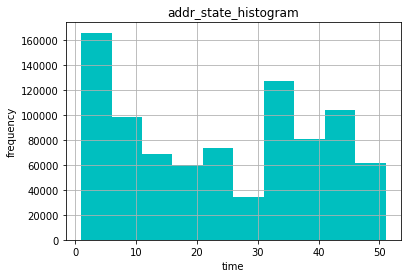

**************************************************
initial_list_status작업 시작
target추가: ['initial_list_status1', 'initial_list_status2']
2.0    498965
1.0    375370
Name: initial_list_status, dtype: int64
True


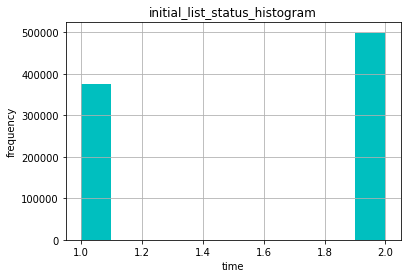

**************************************************
issue_d작업 시작
target추가: ['issue_d63', 'issue_d64', 'issue_d65', 'issue_d66', 'issue_d67', 'issue_d68', 'issue_d69', 'issue_d70', 'issue_d71', 'issue_d72', 'issue_d73', 'issue_d74', 'issue_d75', 'issue_d76', 'issue_d77', 'issue_d78', 'issue_d79', 'issue_d80', 'issue_d81', 'issue_d82', 'issue_d83', 'issue_d84', 'issue_d85', 'issue_d86', 'issue_d87', 'issue_d88', 'issue_d89', 'issue_d90', 'issue_d91', 'issue_d92', 'issue_d93', 'issue_d94', 'issue_d95', 'issue_d96', 'issue_d97', 'issue_d98', 'issue_d99', 'issue_d100', 'issue_d101', 'issue_d102', 'issue_d103', 'issue_d104', 'issue_d105', 'issue_d106', 'issue_d107', 'issue_d108', 'issue_d109', 'issue_d110', 'issue_d111', 'issue_d112', 'issue_d113', 'issue_d114', 'issue_d115', 'issue_d116', 'issue_d117', 'issue_d118']
106.0    35045
89.0     31086
92.0     28094
101.0    26551
98.0     24659
103.0    24177
86.0     23441
105.0    22477
107.0    22194
111.0    21726
115.0    21656
118.0    2104

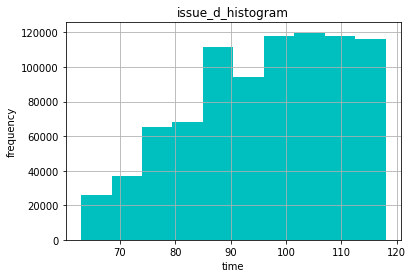

**************************************************
mths_since_last_delinq작업 시작
target추가: ['mths_since_last_delinq1', 'mths_since_last_delinq2', 'mths_since_last_delinq3', 'mths_since_last_delinq4', 'mths_since_last_delinq5', 'mths_since_last_delinq6', 'mths_since_last_delinq7', 'mths_since_last_delinq8', 'mths_since_last_delinq9', 'mths_since_last_delinq10', 'mths_since_last_delinq11']
1.0     428837
3.0      51469
8.0      46417
2.0      45710
7.0      44706
5.0      44566
11.0     43778
9.0      43422
10.0     43112
6.0      42363
4.0      39955
Name: mths_since_last_delinq, dtype: int64
True


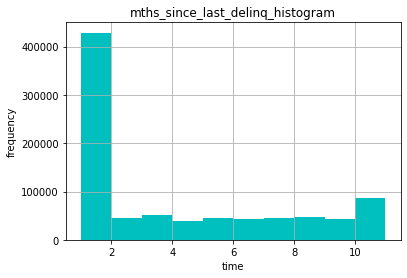

**************************************************
mths_since_last_major_derog작업 시작
target추가: ['mths_since_last_major_derog1', 'mths_since_last_major_derog2', 'mths_since_last_major_derog3', 'mths_since_last_major_derog4', 'mths_since_last_major_derog5', 'mths_since_last_major_derog6', 'mths_since_last_major_derog7', 'mths_since_last_major_derog8', 'mths_since_last_major_derog9', 'mths_since_last_major_derog10', 'mths_since_last_major_derog11']
1.0     630706
3.0      26586
7.0      25825
10.0     25132
2.0      25077
5.0      24998
4.0      24216
11.0     23474
8.0      23086
6.0      22684
9.0      22551
Name: mths_since_last_major_derog, dtype: int64
True


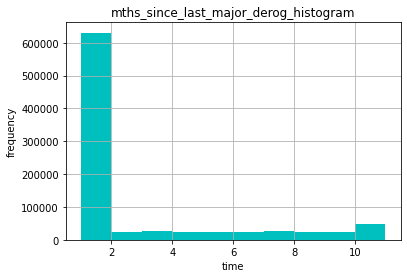

**************************************************
mths_since_last_record작업 시작
target추가: ['mths_since_last_record1', 'mths_since_last_record2', 'mths_since_last_record3', 'mths_since_last_record4', 'mths_since_last_record5', 'mths_since_last_record6', 'mths_since_last_record7', 'mths_since_last_record8', 'mths_since_last_record9', 'mths_since_last_record10', 'mths_since_last_record11']
1.0     722047
5.0      16397
7.0      15741
10.0     15654
6.0      15543
2.0      15506
3.0      15425
4.0      15196
9.0      14526
8.0      14435
11.0     13865
Name: mths_since_last_record, dtype: int64
True


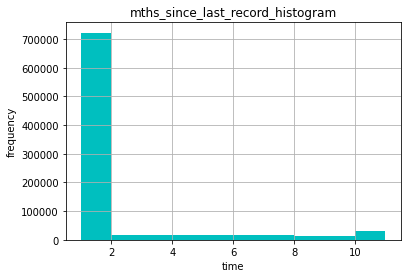

**************************************************
mths_since_rcnt_il작업 시작
target추가: ['mths_since_rcnt_il1', 'mths_since_rcnt_il2', 'mths_since_rcnt_il3', 'mths_since_rcnt_il4', 'mths_since_rcnt_il5', 'mths_since_rcnt_il6', 'mths_since_rcnt_il7', 'mths_since_rcnt_il8', 'mths_since_rcnt_il9', 'mths_since_rcnt_il10', 'mths_since_rcnt_il11']
1.0     562763
2.0      45120
6.0      35254
8.0      31991
11.0     31159
10.0     30425
9.0      29319
7.0      28366
4.0      28227
3.0      27564
5.0      24147
Name: mths_since_rcnt_il, dtype: int64
True


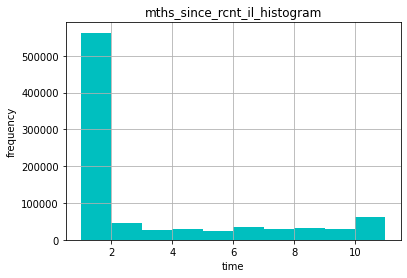

**************************************************
mths_since_recent_bc작업 시작
target추가: ['mths_since_recent_bc1', 'mths_since_recent_bc2', 'mths_since_recent_bc3', 'mths_since_recent_bc4', 'mths_since_recent_bc5', 'mths_since_recent_bc6', 'mths_since_recent_bc7', 'mths_since_recent_bc8', 'mths_since_recent_bc9', 'mths_since_recent_bc10', 'mths_since_recent_bc11']
2.0     118627
6.0      98167
8.0      89631
5.0      88021
11.0     86242
9.0      82199
10.0     81078
3.0      79297
7.0      73161
4.0      69918
1.0       7994
Name: mths_since_recent_bc, dtype: int64
True


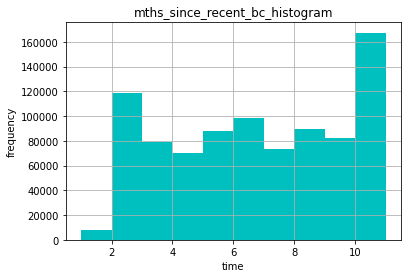

**************************************************
mths_since_recent_bc_dlq작업 시작
target추가: ['mths_since_recent_bc_dlq1', 'mths_since_recent_bc_dlq2', 'mths_since_recent_bc_dlq3', 'mths_since_recent_bc_dlq4', 'mths_since_recent_bc_dlq5', 'mths_since_recent_bc_dlq6', 'mths_since_recent_bc_dlq7', 'mths_since_recent_bc_dlq8', 'mths_since_recent_bc_dlq9', 'mths_since_recent_bc_dlq10', 'mths_since_recent_bc_dlq11']
1.0     651075
2.0      23654
5.0      22999
3.0      22822
4.0      22756
6.0      22429
9.0      22359
7.0      22274
11.0     21665
10.0     21629
8.0      20673
Name: mths_since_recent_bc_dlq, dtype: int64
True


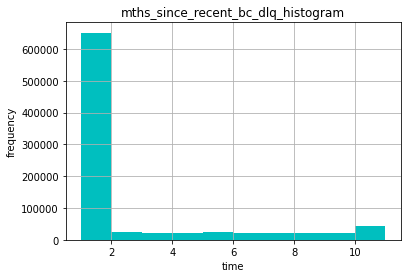

**************************************************
mths_since_recent_inq작업 시작
target추가: ['mths_since_recent_inq1', 'mths_since_recent_inq2', 'mths_since_recent_inq3', 'mths_since_recent_inq4', 'mths_since_recent_inq5', 'mths_since_recent_inq6', 'mths_since_recent_inq7', 'mths_since_recent_inq8', 'mths_since_recent_inq9', 'mths_since_recent_inq10']
2.0     156604
3.0     133476
1.0      92824
6.0      89572
8.0      79100
10.0     71651
7.0      71650
9.0      70407
4.0      57612
5.0      51439
Name: mths_since_recent_inq, dtype: int64
True


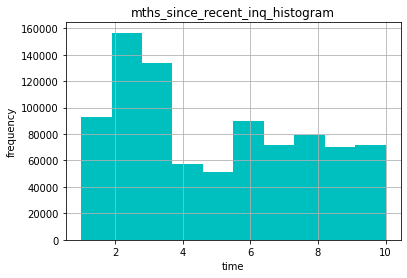

**************************************************
mths_since_recent_revol_delinq작업 시작
target추가: ['mths_since_recent_revol_delinq1', 'mths_since_recent_revol_delinq2', 'mths_since_recent_revol_delinq3', 'mths_since_recent_revol_delinq4', 'mths_since_recent_revol_delinq5', 'mths_since_recent_revol_delinq6', 'mths_since_recent_revol_delinq7', 'mths_since_recent_revol_delinq8', 'mths_since_recent_revol_delinq9', 'mths_since_recent_revol_delinq10', 'mths_since_recent_revol_delinq11']
1.0     563605
2.0      33652
3.0      33259
8.0      33054
4.0      31527
7.0      31276
10.0     31136
5.0      30353
9.0      29450
11.0     28757
6.0      28266
Name: mths_since_recent_revol_delinq, dtype: int64
True


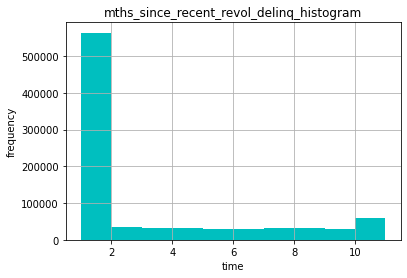

In [27]:
#training data 변환
df = reverse_transform(dummy_cols, df)

In [28]:
df.shape

(874335, 56)

In [29]:
df.columns

Index(['index', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate',
       'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'fico_range_low',
       'fico_range_high', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_amnt', 'last_fico_range_high', 'last_fico_range_low',
       'collections_12_mths_ex_med', 'acc_now_delinq', 'tot_coll_amt',
       'tot_cur_bal', 'chargeoff_within_12_mths', 'delinq_amnt',
       'pub_rec_bankruptcies', 'tax_liens', 'elapsed_t',
       'debt_settlement_flag1', 'term1', 'depvar', 'emp_length',
       'home_ownership', 'verification_status', 'purpose', 'addr_state',
       'initial_list_status', 'issue_d', 'mths_since_last_delinq',
       'mths_since_last_major_derog', 'mths_since_last_record',
       'mths_since_rcnt

**************************************************
emp_length작업 시작
target추가: ['emp_length1', 'emp_length2', 'emp_length3', 'emp_length4', 'emp_length5', 'emp_length6', 'emp_length7', 'emp_length8', 'emp_length9', 'emp_length10', 'emp_length11', 'emp_length12']
2.0     72352
3.0     19686
4.0     17403
11.0    16998
1.0     14083
6.0     13471
12.0    13257
5.0     12679
7.0     10272
9.0     10227
8.0      9804
10.0     8352
Name: emp_length, dtype: int64
True


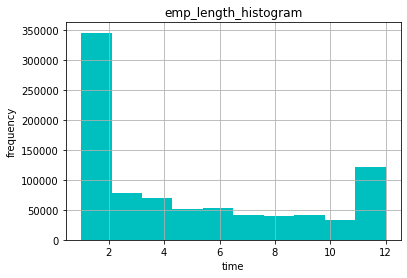

**************************************************
home_ownership작업 시작
target추가: ['home_ownership1', 'home_ownership2', 'home_ownership3', 'home_ownership4', 'home_ownership5', 'home_ownership6']
2.0    105060
6.0     89280
5.0     24147
1.0        81
4.0         9
3.0         7
Name: home_ownership, dtype: int64
True


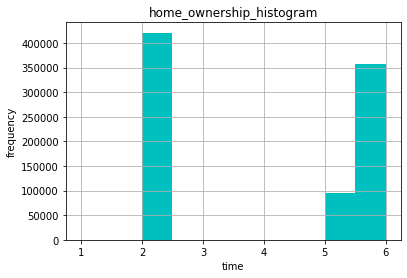

**************************************************
verification_status작업 시작
target추가: ['verification_status1', 'verification_status2', 'verification_status3']
2.0    84584
1.0    73718
3.0    60282
Name: verification_status, dtype: int64
True


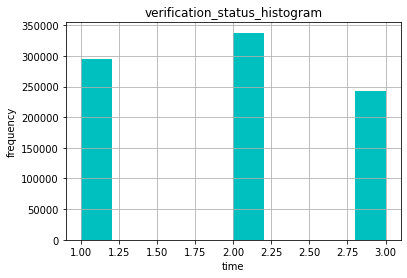

**************************************************
purpose작업 시작
target추가: ['purpose1', 'purpose2', 'purpose3', 'purpose4', 'purpose5', 'purpose6', 'purpose7', 'purpose8', 'purpose9', 'purpose10', 'purpose11', 'purpose12', 'purpose13', 'purpose14']
3.0     125649
2.0      51192
5.0      13600
10.0     12492
7.0       4446
8.0       2491
12.0      2233
1.0       2164
9.0       1556
13.0      1548
6.0        890
14.0       187
11.0       136
Name: purpose, dtype: int64
True


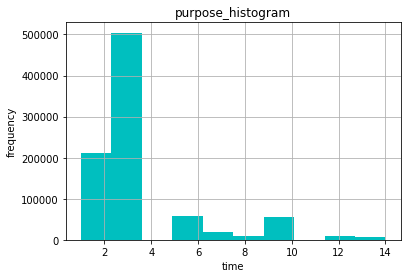

**************************************************
addr_state작업 시작
target추가: ['addr_state1', 'addr_state2', 'addr_state3', 'addr_state4', 'addr_state5', 'addr_state6', 'addr_state7', 'addr_state8', 'addr_state9', 'addr_state10', 'addr_state11', 'addr_state12', 'addr_state13', 'addr_state14', 'addr_state15', 'addr_state16', 'addr_state17', 'addr_state18', 'addr_state19', 'addr_state20', 'addr_state21', 'addr_state22', 'addr_state23', 'addr_state24', 'addr_state25', 'addr_state26', 'addr_state27', 'addr_state28', 'addr_state29', 'addr_state30', 'addr_state31', 'addr_state32', 'addr_state33', 'addr_state34', 'addr_state35', 'addr_state36', 'addr_state37', 'addr_state38', 'addr_state39', 'addr_state40', 'addr_state41', 'addr_state42', 'addr_state43', 'addr_state44', 'addr_state45', 'addr_state46', 'addr_state47', 'addr_state48', 'addr_state49', 'addr_state50', 'addr_state51']
5.0     31429
35.0    18460
44.0    18161
10.0    15363
15.0     8796
32.0     7876
39.0     7353
36.0     7152
11.

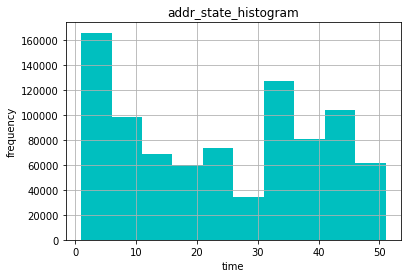

**************************************************
initial_list_status작업 시작
target추가: ['initial_list_status1', 'initial_list_status2']
2.0    124658
1.0     93926
Name: initial_list_status, dtype: int64
True


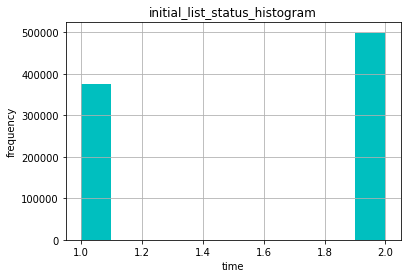

**************************************************
issue_d작업 시작
target추가: ['issue_d63', 'issue_d64', 'issue_d65', 'issue_d66', 'issue_d67', 'issue_d68', 'issue_d69', 'issue_d70', 'issue_d71', 'issue_d72', 'issue_d73', 'issue_d74', 'issue_d75', 'issue_d76', 'issue_d77', 'issue_d78', 'issue_d79', 'issue_d80', 'issue_d81', 'issue_d82', 'issue_d83', 'issue_d84', 'issue_d85', 'issue_d86', 'issue_d87', 'issue_d88', 'issue_d89', 'issue_d90', 'issue_d91', 'issue_d92', 'issue_d93', 'issue_d94', 'issue_d95', 'issue_d96', 'issue_d97', 'issue_d98', 'issue_d99', 'issue_d100', 'issue_d101', 'issue_d102', 'issue_d103', 'issue_d104', 'issue_d105', 'issue_d106', 'issue_d107', 'issue_d108', 'issue_d109', 'issue_d110', 'issue_d111', 'issue_d112', 'issue_d113', 'issue_d114', 'issue_d115', 'issue_d116', 'issue_d117', 'issue_d118']
106.0    8882
89.0     7672
92.0     6956
101.0    6607
98.0     6187
103.0    6026
86.0     5845
105.0    5697
107.0    5493
111.0    5400
115.0    5271
118.0    5246
94.0     5

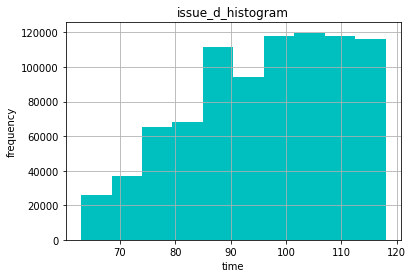

**************************************************
mths_since_last_delinq작업 시작
target추가: ['mths_since_last_delinq1', 'mths_since_last_delinq2', 'mths_since_last_delinq3', 'mths_since_last_delinq4', 'mths_since_last_delinq5', 'mths_since_last_delinq6', 'mths_since_last_delinq7', 'mths_since_last_delinq8', 'mths_since_last_delinq9', 'mths_since_last_delinq10', 'mths_since_last_delinq11']
1.0     107671
3.0      12735
8.0      11570
2.0      11338
5.0      11185
7.0      11069
11.0     11001
10.0     10869
9.0      10648
6.0      10528
4.0       9970
Name: mths_since_last_delinq, dtype: int64
True


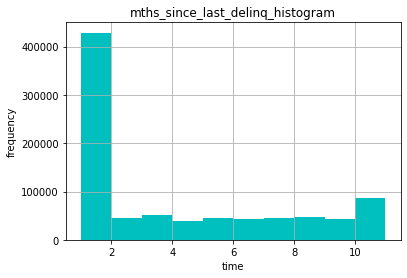

**************************************************
mths_since_last_major_derog작업 시작
target추가: ['mths_since_last_major_derog1', 'mths_since_last_major_derog2', 'mths_since_last_major_derog3', 'mths_since_last_major_derog4', 'mths_since_last_major_derog5', 'mths_since_last_major_derog6', 'mths_since_last_major_derog7', 'mths_since_last_major_derog8', 'mths_since_last_major_derog9', 'mths_since_last_major_derog10', 'mths_since_last_major_derog11']
1.0     157743
3.0       6678
7.0       6362
10.0      6316
5.0       6250
2.0       6237
4.0       6117
11.0      5882
8.0       5767
9.0       5724
6.0       5508
Name: mths_since_last_major_derog, dtype: int64
True


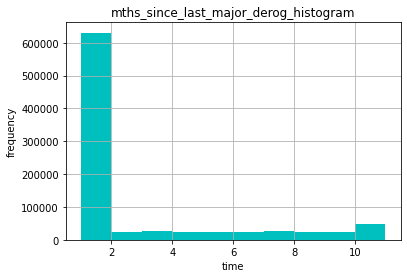

**************************************************
mths_since_last_record작업 시작
target추가: ['mths_since_last_record1', 'mths_since_last_record2', 'mths_since_last_record3', 'mths_since_last_record4', 'mths_since_last_record5', 'mths_since_last_record6', 'mths_since_last_record7', 'mths_since_last_record8', 'mths_since_last_record9', 'mths_since_last_record10', 'mths_since_last_record11']
1.0     180613
5.0       4190
6.0       3950
2.0       3897
7.0       3878
4.0       3871
10.0      3797
3.0       3791
9.0       3607
8.0       3545
11.0      3445
Name: mths_since_last_record, dtype: int64
True


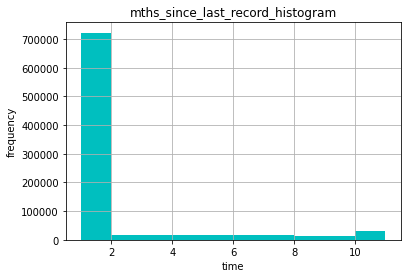

**************************************************
mths_since_rcnt_il작업 시작
target추가: ['mths_since_rcnt_il1', 'mths_since_rcnt_il2', 'mths_since_rcnt_il3', 'mths_since_rcnt_il4', 'mths_since_rcnt_il5', 'mths_since_rcnt_il6', 'mths_since_rcnt_il7', 'mths_since_rcnt_il8', 'mths_since_rcnt_il9', 'mths_since_rcnt_il10', 'mths_since_rcnt_il11']
1.0     141044
2.0      11188
6.0       8822
8.0       7900
11.0      7727
10.0      7624
9.0       7368
4.0       7115
7.0       7055
3.0       6772
5.0       5969
Name: mths_since_rcnt_il, dtype: int64
True


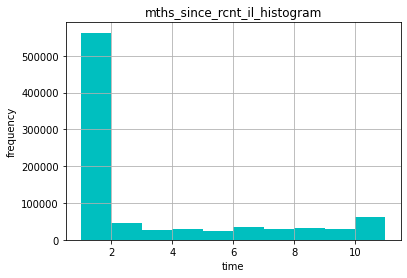

**************************************************
mths_since_recent_bc작업 시작
target추가: ['mths_since_recent_bc1', 'mths_since_recent_bc2', 'mths_since_recent_bc3', 'mths_since_recent_bc4', 'mths_since_recent_bc5', 'mths_since_recent_bc6', 'mths_since_recent_bc7', 'mths_since_recent_bc8', 'mths_since_recent_bc9', 'mths_since_recent_bc10', 'mths_since_recent_bc11']
2.0     29619
6.0     24183
8.0     22288
5.0     22199
11.0    21348
9.0     20744
10.0    20322
3.0     20071
7.0     18318
4.0     17477
1.0      2015
Name: mths_since_recent_bc, dtype: int64
True


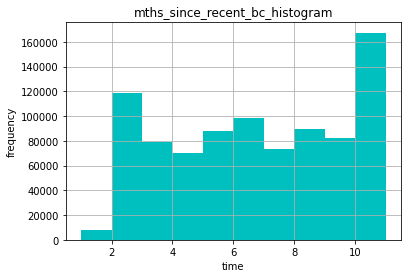

**************************************************
mths_since_recent_bc_dlq작업 시작
target추가: ['mths_since_recent_bc_dlq1', 'mths_since_recent_bc_dlq2', 'mths_since_recent_bc_dlq3', 'mths_since_recent_bc_dlq4', 'mths_since_recent_bc_dlq5', 'mths_since_recent_bc_dlq6', 'mths_since_recent_bc_dlq7', 'mths_since_recent_bc_dlq8', 'mths_since_recent_bc_dlq9', 'mths_since_recent_bc_dlq10', 'mths_since_recent_bc_dlq11']
1.0     162937
2.0       5948
4.0       5724
3.0       5724
6.0       5652
5.0       5626
9.0       5614
7.0       5531
10.0      5506
11.0      5288
8.0       5034
Name: mths_since_recent_bc_dlq, dtype: int64
True


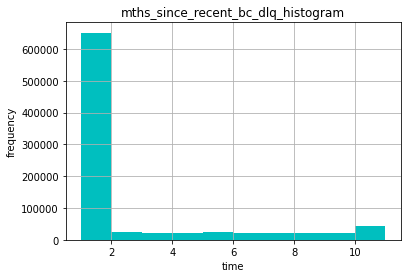

**************************************************
mths_since_recent_inq작업 시작
target추가: ['mths_since_recent_inq1', 'mths_since_recent_inq2', 'mths_since_recent_inq3', 'mths_since_recent_inq4', 'mths_since_recent_inq5', 'mths_since_recent_inq6', 'mths_since_recent_inq7', 'mths_since_recent_inq8', 'mths_since_recent_inq9', 'mths_since_recent_inq10']
2.0     39086
3.0     33230
1.0     23397
6.0     22264
8.0     19763
7.0     18109
10.0    18089
9.0     17560
4.0     14398
5.0     12688
Name: mths_since_recent_inq, dtype: int64
True


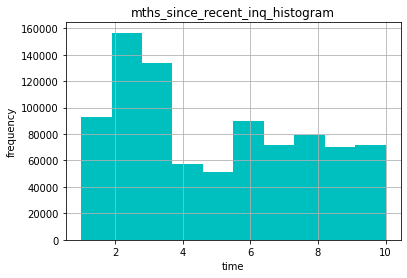

**************************************************
mths_since_recent_revol_delinq작업 시작
target추가: ['mths_since_recent_revol_delinq1', 'mths_since_recent_revol_delinq2', 'mths_since_recent_revol_delinq3', 'mths_since_recent_revol_delinq4', 'mths_since_recent_revol_delinq5', 'mths_since_recent_revol_delinq6', 'mths_since_recent_revol_delinq7', 'mths_since_recent_revol_delinq8', 'mths_since_recent_revol_delinq9', 'mths_since_recent_revol_delinq10', 'mths_since_recent_revol_delinq11']
1.0     141257
3.0       8330
2.0       8295
8.0       8249
10.0      7957
4.0       7931
7.0       7804
5.0       7391
9.0       7282
11.0      7079
6.0       7009
Name: mths_since_recent_revol_delinq, dtype: int64
True


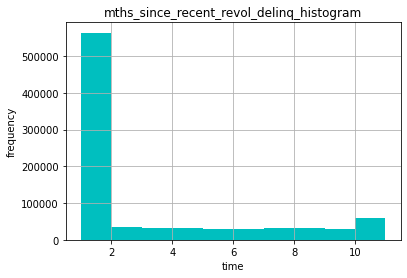

In [30]:
#test data 역변환
test = reverse_transform(dummy_cols, test)

In [ ]:
df.to_pickle("compression_lendingclub.pkl")

In [33]:
test.to_pickle("compression_lendingclub_test.pkl")